## 0. 파일 불러오기

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

from google.colab import drive
drive.mount('/content/drive')
PATH = "/content/drive/MyDrive/KUBIG"
df = pd.read_csv(PATH+"/HousingData.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1 EDA


### 1.1 자료 내용 확인

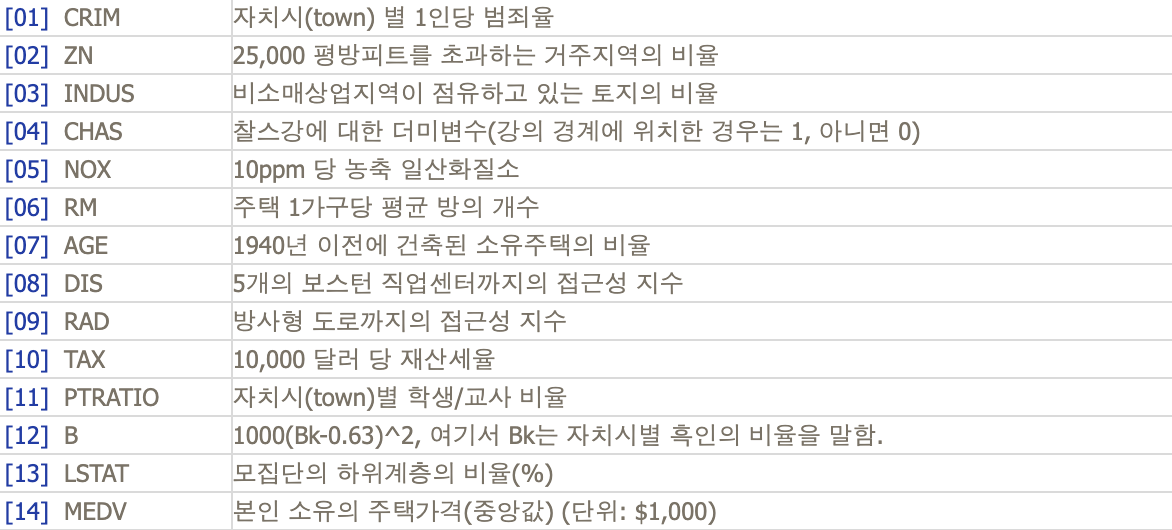

In [116]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [117]:
# 데이터의 개수 : 506
df.shape

(506, 14)

### 1.2 범주형 변수의 처리 

In [118]:
# CHAS가 범주형 변수이므로 가변수화
df = pd.get_dummies(df, columns = ["CHAS"], drop_first=True)

In [119]:
df = df[['CRIM', 'ZN', 'INDUS', "CHAS_1.0", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]]

### 1.3 결측치 처리

In [120]:
df.isnull().sum()

CRIM        20
ZN          20
INDUS       20
CHAS_1.0     0
NOX          0
RM           0
AGE         20
DIS          0
RAD          0
TAX          0
PTRATIO      0
B            0
LSTAT       20
MEDV         0
dtype: int64

In [121]:
# 결측치가 하나라도 있는 행을 제거할 경우 데이터의 개수가 506개에서 411개로 감소 (대략 20%)
# 결측치를 보간하는 여러 방법 (분석자의 직관에 의해 중요하다고 생각하는 변수만 보간하고 덜 중요하다고 생각되는 변수는 제거 / 평균이나 중앙값으로 보간 등)이 있으나, 여기선 논의의 편의를 위해 결측치가 하나라도 있는 데이터를 제거한 채 분석 진행.
df.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 411 entries, 0 to 504
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CRIM      411 non-null    float64
 1   ZN        411 non-null    float64
 2   INDUS     411 non-null    float64
 3   CHAS_1.0  411 non-null    uint8  
 4   NOX       411 non-null    float64
 5   RM        411 non-null    float64
 6   AGE       411 non-null    float64
 7   DIS       411 non-null    float64
 8   RAD       411 non-null    int64  
 9   TAX       411 non-null    int64  
 10  PTRATIO   411 non-null    float64
 11  B         411 non-null    float64
 12  LSTAT     411 non-null    float64
 13  MEDV      411 non-null    float64
dtypes: float64(11), int64(2), uint8(1)
memory usage: 45.4 KB


In [123]:
df = df.dropna()

### 1.4 히스토그램과 상관계수 그래프

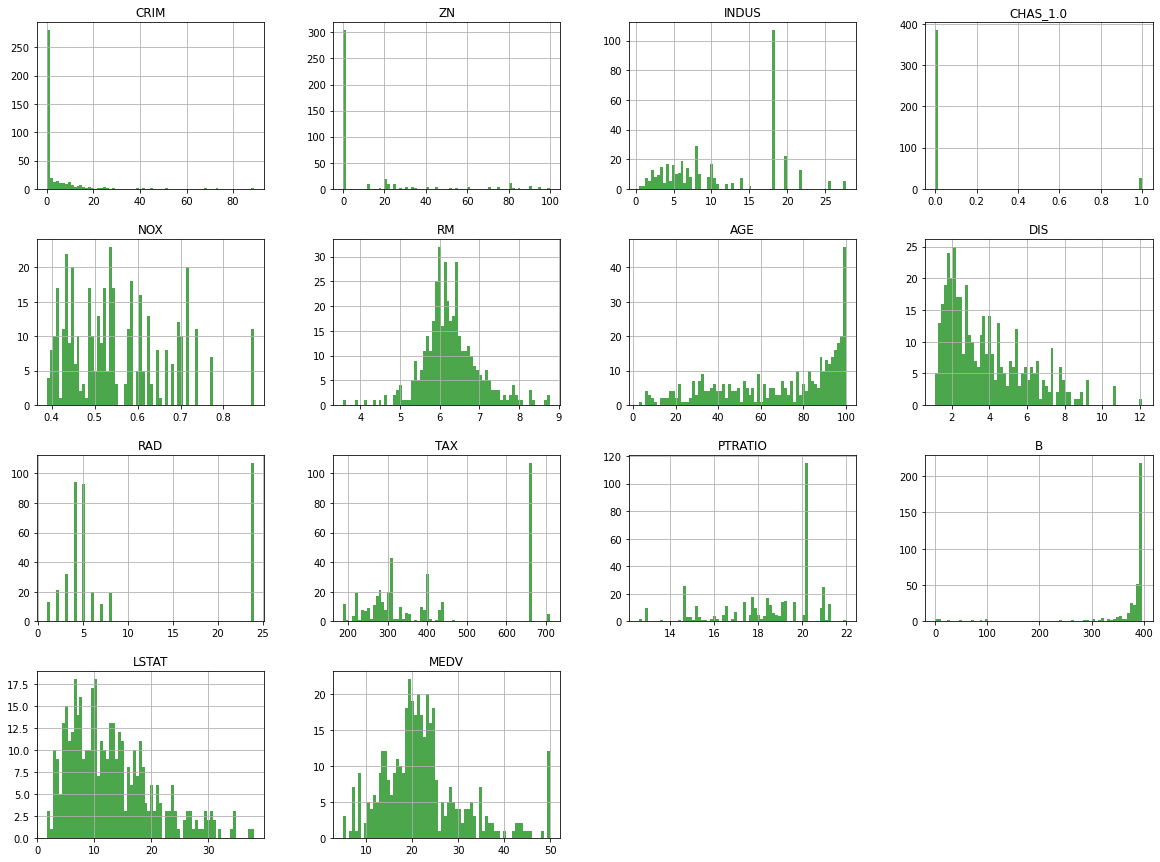

In [124]:
df.hist(bins =70, figsize = (20,15), color = 'green', alpha = 0.7)
plt.show()

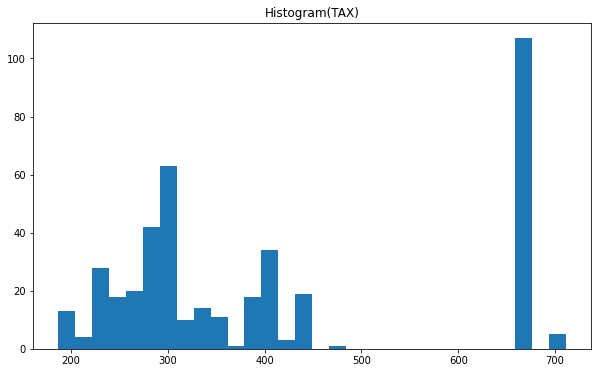

In [125]:
# TAX변수 : 다소 극단적인 형태 (양 극단에 자료가 몰려있음, 양봉분포)
plt.figure(figsize=(10,6))
plt.hist(df.TAX, bins=30, histtype="bar")
plt.title("Histogram(TAX)")
plt.show()

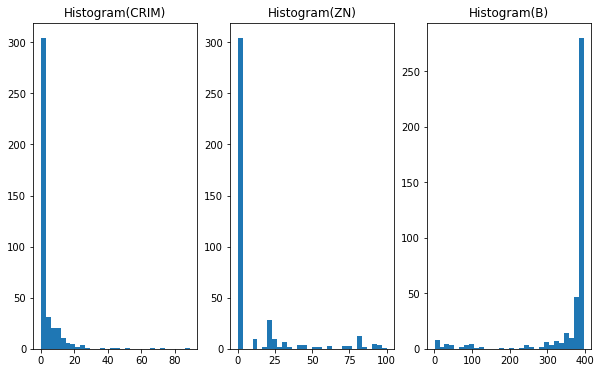

In [126]:
# CRIM, ZN, B : 다소 극단적인 형태 (Skewed)
fig, ax = plt.subplots(1,3, figsize=(10,6))
ax[0].hist(df.CRIM, bins=30, histtype="bar")
ax[0].set_title("Histogram(CRIM)")

ax[1].hist(df.ZN, bins=30, histtype="bar")
ax[1].set_title("Histogram(ZN)")

ax[2].hist(df.B, bins=30, histtype="bar")
ax[2].set_title("Histogram(B)")
plt.show()

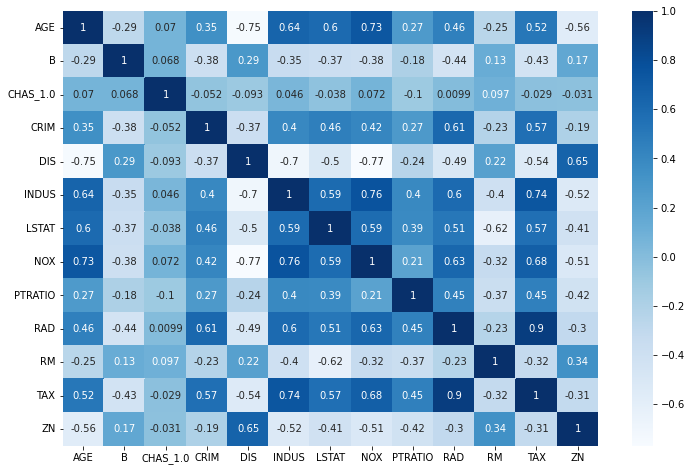

In [127]:
# Target variable 인 MEDV를 제외하고 상관계수 Input Variable 끼리 상관계수 분석
corr = df[df.columns.difference(['MEDV'])].corr()
 
# 상관계수의 절대값이 0.6 이상인 변수들이 다수 존재 (다중공선성의 위험)
plt.figure(figsize = (12,8))
sns.heatmap(corr, annot=True, cmap='Blues')

### 1.5 Dataset 분리

In [128]:
X = df.iloc[:, 0:13].values
y = df.iloc[:, 13].values.reshape(-1,1)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3, random_state = 2018)

print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",Y_train.shape)
print("Shape of y_test",Y_test.shape)

Shape of X_train:  (287, 13)
Shape of X_test:  (124, 13)
Shape of y_train:  (287, 1)
Shape of y_test (124, 1)


## 2 Regression


**회귀분석의 표준적인 가정들** 

(여기서는 2번 까지의 가정이 만족한다는 전제 하에 분석)
1. 모형의 형태에 관한 가정 (선형성)
2. 오차에 관한 가정 (정규성, 등분산성, 독립성)
 - 등분산성 <--> 이분산성 / 독립성 <--> 자기상관성
3. 예측변수들끼리 선형종속이 아니다. (공선성)




**모형화의 목표**

해석 / 예측 (ML?)

* 다중공선성이 존재할 경우 
    * 해석의 측면 : 각각의 변수의 개별적인 효과를 추정하는 일이 불가능해지며 오히려 변수들간의 상관관계를 설명할 수 있는 저변의 이유를 찾는 일이 하나가 될 수 있음
    * 예측의 측면 : Train Set과 Test Set의 공분산 구조가 비슷할 경우, 즉 우리가 훈련시키는 데이터의 포괄적인 함수관계의 성격이나 강도가, Test Set에 일관되게 작용할 것이라는 확신이 있다면 그다지 큰 문제가 아닐 수 있다.

### 2.1 모든 Input Variable을 활용하여 선형회귀

In [129]:
# Condition Number (다중공선성을 나타낼 수 있는 하나의 척도)가 1550으로 매우 크게 나타남
# 조건수가 커지는 경우 (변수들의 단위 차이로 인해 숫자의 스케일이 크게 달라지는 경우 // 다중 공선성이 존재하는 경우)
# 조건수가 크다고 해서 다중공선성을 항상 의미하는 것은 아님
# Note[3] 참조

import statsmodels.api as sm

exog = df.iloc[:, :-1]                  # set independent variable
exog = sm.add_constant(exog)            # add constant to independent variable

endog = df['MEDV']                      # set dependent variable

model = sm.OLS(endog=endog, exog=exog)  # modeling
results = model.fit()                   # model fitting

results.summary()                # print summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     96.79
Date:                Wed, 01 Feb 2023   Prob (F-statistic):          3.03e-114
Time:                        15:54:50   Log-Likelihood:                -1193.7
No. Observations:                 411   AIC:                             2415.
Df Residuals:                     397   BIC:                             2472.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.0902      5.462      6.791      0.000      26.353      47.827
CRIM          -0.0980      0.032     -3.027      0.003      -0.162      -0.034
ZN             0.0523      0.014      3.693      0.000       0.024       0.080
INDUS          0.0196      0.065      0.300      0.764      -0.109       0.148
CHAS_1.0       2.8802      0.924      3.117      0.002       1.063       4.697
NOX          -18.8229      4.120     -4.568      0.000     -26.923     -10.723
RM             3.8227      0.446      8.572      0.000       2.946       4.699
AGE           -0.0091      0.014     -0.646      0.519      -0.037       0.019
DIS           -1.5312      0.207     -7.401      0.000      -1.938      -1.124
RAD            0.2936      0.069      4.285      0.000       0.159       0.428
TAX           -0.0134      0.004     -3.393      0.001      -0.021      -0.006
PTRATIO       -0.9150      0.137     -6.671      0.000      -1.185      -0.645
B              0.0082      0.003      2.870      0.004       0.003       0.014
LSTAT         -0.4595      0.053     -8.667      0.000      -0.564      -0.355
==============================================================================
Omnibus:                      157.791   Durbin-Watson:                   1.215
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              784.011
Skew:                           1.592   Prob(JB):                    5.68e-171
Kurtosis:                       8.971   Cond. No.                     1.55e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.55e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [130]:
# VIF 수치
# VIF 수치 또한 10을 넘을 경우 다중공선성이 존재함을 의미

lm = sm.OLS(df['MEDV'], df[['CRIM', 'ZN', 'INDUS', "CHAS_1.0", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"]])
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = []
reg_coef = []
vif = []
for i in range(len(lm.exog_names)):
    col_name = lm.exog_names[i]
    variables.append(col_name)
    reg_coef.append(lm.fit().params[col_name])
    vif.append(variance_inflation_factor(lm.exog, i))
    
df_res = pd.DataFrame()
df_res['Variable'] = variables
df_res['Estimate'] = reg_coef
df_res['VIF'] = vif

df_res.sort_values(by="VIF", ascending=False)


,Variable,Estimate,VIF
10,PTRATIO,-0.366202,86.991015
5,RM,5.960745,80.763767
4,NOX,-3.076075,75.569015
9,TAX,-0.010354,60.959797
6,AGE,-0.016878,22.352844
11,B,0.014303,20.541750
2,INDUS,-0.011747,14.596759
8,RAD,0.157671,14.541166
7,DIS,-1.013500,14.253231
12,LSTAT,-0.347670,11.180556


**Condition Number와 VIF를 확인하였을 때, 다중공선성이 확인된다.**

#### 2.1.1 Train / Test 나눠서 RMSE 도출 (예측의 관점)

In [131]:
from sklearn.linear_model import LinearRegression
regressor_linear = LinearRegression()
regressor_linear.fit(X_train, Y_train)


from sklearn.metrics import r2_score

# Predicting Cross Validation Score the Test set results
cv_linear = cross_val_score(estimator = regressor_linear, X = X_train, y = Y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_linear_train = regressor_linear.predict(X_train)
r2_score_linear_train = r2_score(Y_train, y_pred_linear_train)

# Predicting R2 Score the Test set results
y_pred_linear_test = regressor_linear.predict(X_test)
r2_score_linear_test = r2_score(Y_test, y_pred_linear_test)

# Predicting RMSE the Test set results
rmse_linear = (np.sqrt(mean_squared_error(Y_test, y_pred_linear_test)))
print("CV: ", cv_linear.mean())
print('R2_score (train): ', r2_score_linear_train)
print('R2_score (test): ', r2_score_linear_test)
print("RMSE: ", rmse_linear)

CV:  0.61570341458036
R2_score (train):  0.7376394236736472
R2_score (test):  0.7911749276893901
RMSE:  3.970743509889718


### 2.2 Stepwise Selection을 활용하여 변수 선택 후 선형회귀

In [132]:
import warnings
warnings.filterwarnings('ignore')

## 전진 단계별 선택법
variables = df.columns.difference(['MEDV','intercept']).tolist() ## 설명 변수 리스트
 
y = df['MEDV'] ## 반응 변수
selected_variables = [] ## 선택된 변수들
sl_enter = 0.05
sl_remove = 0.05
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(variables) > 0:
    remainder = list(set(variables) - set(selected_variables))
    pval = pd.Series(index=remainder) ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
    ## 선형 모형을 적합한다.
    for col in remainder: 
        X = df[selected_variables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y,X).fit()
        pval[col] = model.pvalues[col]
 
    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        selected_variables.append(pval.idxmin())
        ## 선택된 변수들에대해서
        ## 어떤 변수를 제거할지 고른다.
        while len(selected_variables) > 0:
            selected_X = df[selected_variables]
            selected_X = sm.add_constant(selected_X)
            selected_pval = sm.OLS(y,selected_X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
            max_pval = selected_pval.max()
            if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                remove_variable = selected_pval.idxmax()
                selected_variables.remove(remove_variable)
            else:
                break
        
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(df[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

selected_variables # 선택된 변수 11개

['LSTAT',
 'RM',
 'PTRATIO',
 'CHAS_1.0',
 'B',
 'DIS',
 'NOX',
 'ZN',
 'CRIM',
 'RAD',
 'TAX']

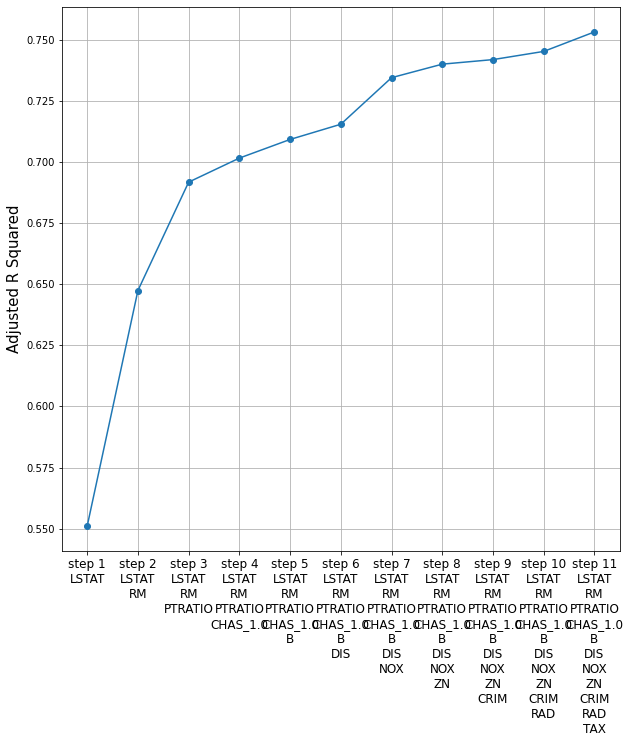

In [133]:
fig = plt.figure(figsize=(10,10))
fig.set_facecolor('white')
 
font_size = 15
plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12)
plt.plot(steps,adjusted_r_squared, marker='o')
    
plt.ylabel('Adjusted R Squared',fontsize=font_size)
plt.grid(True)
plt.show()

In [134]:
# Condition Number (다중공선성을 나타낼 수 있는 하나의 척도)가 1510으로 매우 크게 나타남
# 조건수가 커지는 경우 (변수들의 단위 차이로 인해 숫자의 스케일이 크게 달라지는 경우 // 다중 공선성이 존재하는 경우)
# 조건수가 크다고 해서 다중공선성을 항상 의미하는 것은 아님
# Note[3] 참조

exog2 = df.loc[:, ['CRIM', 'ZN', "CHAS_1.0", "NOX", "RM", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"]]                  # set independent variable
exog2 = sm.add_constant(exog2)            # add constant to independent variable

endog = df['MEDV']                      # set dependent variable

model2 = sm.OLS(endog=endog, exog=exog2)  # modeling
results2 = model2.fit()                   # model fitting

results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     114.8
Date:                Wed, 01 Feb 2023   Prob (F-statistic):          3.37e-116
Time:                        15:55:03   Log-Likelihood:                -1193.9
No. Observations:                 411   AIC:                             2412.
Df Residuals:                     399   BIC:                             2460.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.2615      5.419      6.876      0.000      26.608      47.915
CRIM          -0.0983      0.032     -3.042      0.003      -0.162      -0.035
ZN             0.0530      0.014      3.804      0.000       0.026       0.080
CHAS_1.0       2.8901      0.918      3.147      0.002       1.084       4.696
NOX          -19.2082      3.788     -5.071      0.000     -26.655     -11.762
RM             3.7489      0.433      8.663      0.000       2.898       4.600
DIS           -1.5029      0.194     -7.759      0.000      -1.884      -1.122
RAD            0.2915      0.065      4.490      0.000       0.164       0.419
TAX           -0.0129      0.003     -3.733      0.000      -0.020      -0.006
PTRATIO       -0.9159      0.136     -6.759      0.000      -1.182      -0.649
B              0.0081      0.003      2.844      0.005       0.003       0.014
LSTAT         -0.4706      0.050     -9.450      0.000      -0.568      -0.373
==============================================================================
Omnibus:                      155.041   Durbin-Watson:                   1.223
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              749.918
Skew:                           1.570   Prob(JB):                    1.44e-163
Kurtosis:                       8.825   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [135]:
# VIF수치
# VIF 수치 또한 10을 넘을 경우 다중공선성이 존재함을 의미

lm2 = sm.OLS(df['MEDV'], df[['CRIM', 'ZN', "CHAS_1.0", "NOX", "RM", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"]])
variables = []
reg_coef = []
vif = []
for i in range(len(lm2.exog_names)):
    col_name = lm2.exog_names[i]
    variables.append(col_name)
    reg_coef.append(lm2.fit().params[col_name])
    vif.append(variance_inflation_factor(lm2.exog, i))
    
df_res = pd.DataFrame()
df_res['Variable'] = variables
df_res['Estimate'] = reg_coef
df_res['VIF'] = vif

df_res.sort_values(by="VIF", ascending=False)

,Variable,Estimate,VIF
8,PTRATIO,-0.371679,86.004055
4,RM,5.888720,73.478172
3,NOX,-4.398286,63.483490
7,TAX,-0.010836,47.302124
9,B,0.014256,20.493305
6,RAD,0.166997,13.210633
5,DIS,-0.923667,11.765118
10,LSTAT,-0.367678,9.966971
1,ZN,0.057924,2.739012
0,CRIM,-0.081523,2.040978


**Stepwise Feature Selection 으로도 다중공선성을 해결하지 못하였음.**

#### 2.2.1 Train / Test 나눠서 RMSE 도출

In [136]:
X_1 = df.loc[:, ["CRIM", "ZN", "CHAS_1.0", "NOX", "RM", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"]].values
y = df.iloc[:, 13].values.reshape(-1,1)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_1_train, X_1_test, Y_train, Y_test = train_test_split(X_1, y, test_size = 0.3, random_state = 2018)


from sklearn.linear_model import LinearRegression
regressor_linear = LinearRegression()
regressor_linear.fit(X_1_train, Y_train)

from sklearn.metrics import r2_score

# Predicting Cross Validation Score the Test set results
cv_linear = cross_val_score(estimator = regressor_linear, X = X_1_train, y = Y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_linear_train = regressor_linear.predict(X_1_train)
r2_score_linear_train = r2_score(Y_train, y_pred_linear_train)

# Predicting R2 Score the Test set results
y_pred_linear_test = regressor_linear.predict(X_1_test)
r2_score_linear_test = r2_score(Y_test, y_pred_linear_test)

# Predicting RMSE the Test set results
rmse_linear = (np.sqrt(mean_squared_error(Y_test, y_pred_linear_test)))
print("CV: ", cv_linear.mean())
print('R2_score (train): ', r2_score_linear_train)
print('R2_score (test): ', r2_score_linear_test)
print("RMSE: ", rmse_linear)

CV:  0.6169450925394704
R2_score (train):  0.7363410201972476
R2_score (test):  0.7990813129420404
RMSE:  3.8948494945629824


### 2.3 VIF 높은 인자 제거 후 선형회귀 (VIF가 20 이상인 여섯가지 변수)

In [137]:
# Condition Number (다중공선성을 나타낼 수 있는 하나의 척도)가 138로 줄어들었음을 알 수 있음
# 조건수가 커지는 경우 (변수들의 단위 차이로 인해 숫자의 스케일이 크게 달라지는 경우 // 다중 공선성이 존재하는 경우)
# 조건수가 크다고 해서 꼭 다중공선성을 의미하는 것은 아님
# Note[3] 참조

exog3 = df.loc[:, ['CRIM', 'ZN', "CHAS_1.0", "DIS", "RAD", "LSTAT", "INDUS"]]                  # set independent variable
exog3 = sm.add_constant(exog3)            # add constant to independent variable

endog = df['MEDV']                      # set dependent variable

model3 = sm.OLS(endog=endog, exog=exog3)  # modeling
results3 = model3.fit()                   # model fitting

results3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     109.4
Date:                Wed, 01 Feb 2023   Prob (F-statistic):           3.95e-89
Time:                        15:55:29   Log-Likelihood:                -1268.2
No. Observations:                 411   AIC:                             2552.
Df Residuals:                     403   BIC:                             2585.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.6803      1.296     32.164      0.000      39.133      44.228
CRIM          -0.0936      0.038     -2.451      0.015      -0.169      -0.019
ZN             0.0973      0.015      6.531      0.000       0.068       0.127
CHAS_1.0       4.6444      1.078      4.309      0.000       2.525       6.763
DIS           -1.7386      0.203     -8.561      0.000      -2.138      -1.339
RAD           -0.0051      0.044     -0.115      0.909      -0.092       0.082
LSTAT         -0.8066      0.049    -16.563      0.000      -0.902      -0.711
INDUS         -0.3165      0.062     -5.070      0.000      -0.439      -0.194
==============================================================================
Omnibus:                      123.343   Durbin-Watson:                   1.215
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              318.481
Skew:                           1.465   Prob(JB):                     6.96e-70
Kurtosis:                       6.165   Cond. No.                         138.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [138]:
# VIF수치
# VIF 수치 또한 10을 넘을 경우 다중공선성이 존재함을 의미

lm3 = sm.OLS(df['MEDV'], df[['CRIM', 'ZN', "CHAS_1.0", "DIS", "RAD", "LSTAT", "INDUS"]])

variables = []
reg_coef = []
vif = []
for i in range(len(lm3.exog_names)):
    col_name = lm3.exog_names[i]
    variables.append(col_name)
    reg_coef.append(lm3.fit().params[col_name])
    vif.append(variance_inflation_factor(lm3.exog, i))
    
df_res = pd.DataFrame()
df_res['Variable'] = variables
df_res['Estimate'] = reg_coef
df_res['VIF'] = vif

df_res.sort_values(by="VIF", ascending=False)

,Variable,Estimate,VIF
5,LSTAT,-0.300988,6.604300
6,INDUS,0.798521,6.578146
4,RAD,0.112731,4.684889
3,DIS,3.567870,3.814917
1,ZN,0.070412,2.205277
0,CRIM,-0.156340,2.010185
2,CHAS_1.0,9.588395,1.074822


#### 2.3.1 Train / Test 나눠서 RMSE 도출

In [139]:
X_2 = df.loc[:, ['CRIM', 'ZN', "CHAS_1.0", "DIS", "RAD", "LSTAT", "INDUS"]].values
y = df.iloc[:, 13].values.reshape(-1,1)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_2_train, X_2_test, Y_train, Y_test = train_test_split(X_2, y, test_size = 0.3, random_state = 2018)


from sklearn.linear_model import LinearRegression
regressor_linear = LinearRegression()
regressor_linear.fit(X_2_train, Y_train)

from sklearn.metrics import r2_score

# Predicting Cross Validation Score the Test set results
cv_linear = cross_val_score(estimator = regressor_linear, X = X_2_train, y = Y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_linear_train = regressor_linear.predict(X_2_train)
r2_score_linear_train = r2_score(Y_train, y_pred_linear_train)

# Predicting R2 Score the Test set results
y_pred_linear_test = regressor_linear.predict(X_2_test)
r2_score_linear_test = r2_score(Y_test, y_pred_linear_test)

# Predicting RMSE the Test set results
rmse_linear = (np.sqrt(mean_squared_error(Y_test, y_pred_linear_test)))
print("CV: ", cv_linear.mean())
print('R2_score (train): ', r2_score_linear_train)
print('R2_score (test): ', r2_score_linear_test)
print("RMSE: ", rmse_linear)

CV:  0.5381839736300524
R2_score (train):  0.6410296477726147
R2_score (test):  0.6584246251219439
RMSE:  5.078363589554248


**다중공선성을 나타내는 수치를 줄이긴 하였으나, 예측의 측면에 있어서는 성능이 떨어짐.**

### 2.4 Lasso 이용 (alpha = 0.3)
 * Hyperparameter Tuning 없이 임의의 값 사용



In [140]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

# 규제 강도 설정
alpha = 0.3

# 라소 모형 구축
lasso = Lasso(alpha= alpha, max_iter = 10000).fit(X_train, Y_train)

# 회귀계수가 0이 아닌 것을 True, False로 분류한 값을 원래 feature name에 넣으면 feature list 출력
feature_list = lasso.coef_
feature_list

array([-6.11036003e-02,  6.60885934e-02,  2.06615077e-03,  0.00000000e+00,
       -0.00000000e+00,  2.60139938e+00,  2.61189257e-03, -1.13404093e+00,
        3.01819438e-01, -1.88159785e-02, -6.98190207e-01,  7.33658493e-03,
       -6.44366581e-01])

In [141]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Lasso(alpha=0.3, fit_intercept=True, max_iter=3000))
]

lasso_pipe = Pipeline(steps)
lasso_pipe.fit(X_train, Y_train)

Pipeline(steps=[('scalar', StandardScaler()), ('poly', PolynomialFeatures()),
                ('model', Lasso(alpha=0.3, max_iter=3000))])

#### 2.3.1 Train / Test 나눠서 RMSE 도출

In [142]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score
cv_lasso = cross_val_score(estimator = lasso_pipe, X = X_train, y = Y_train, cv = 10)

# Predicting R2 Score the Test set results
y_pred_lasso_train = lasso_pipe.predict(X_train)
r2_score_lasso_train = r2_score(Y_train, y_pred_lasso_train)

# Predicting R2 Score the Test set results
y_pred_lasso_test = lasso_pipe.predict(X_test)
r2_score_lasso_test = r2_score(Y_test, y_pred_lasso_test)

# Predicting RMSE the Test set results
rmse_lasso = (np.sqrt(mean_squared_error(Y_test, y_pred_lasso_test)))
print('CV: ', cv_lasso.mean())
print('R2_score (train): ', r2_score_lasso_train)
print('R2_score (test): ', r2_score_lasso_test)
print("RMSE: ", rmse_lasso)

CV:  0.7577246296067782
R2_score (train):  0.852915480786923
R2_score (test):  0.8468856920486475
RMSE:  3.400074259499596


### 2.4 정리

In [ ]:
# 모든 변수 활용 선형회귀
# R2_score (test):  0.791
# RMSE:  3.97

In [ ]:
# Stepwise Selection 
# R2_score (test):  0.799
# RMSE:  3.89

In [ ]:
# VIF 높은 인자 제거
# R2_score (test):  0.658
# RMSE:  5.07

In [ ]:
# LASSO
# R2_score (test):  0.846
# RMSE:  3.40

## 3 결론


* 변수선택을 이용한 선형회귀와 축소추정량을 이용한 LASSO를 포함해 4 가지 모델을 사용하였다. 


* 이 때, 앞의 두 모델 (Full Model, Stepwise Selection)의 경우 R^2 Score와 RMSE이 좋은 지표를 나타내고 있어 모델의 예측력은 좋게 평가할 수 있으나, 다중공선성의 문제가 있어 이 모델을 활용하여 사회 현상을 해석할 수는 없다는 단점이 있다. 해석적인 측면에서는 매우 잘못된 모델이다. 


* 다중공선성을 해결하기 위해 VIF가 높은 변수들을 제거한 뒤 선형회귀를 돌렸을 경우, R^2 Score와 RMSE가 앞의 두 모델보다 낮으므로 모델의 예측력은 다소 떨어지는 편이다. 하지만 위의 두 모델 보다 변수의 개수가 적으며 다중공선성 문제를 일부 해결했다는 점에서 모델의 해석력은 앞의 두 모델 보다 높다고 할 수 있다.


* LASSO의 경우, 모델의 특성상 가중치들을 0으로 보내는 특성이 있기 때문에, 다중공선성을 해결하기 위한 하나의 방법으로 이용할 수 있으며, 앞에서 언급된 세 모델 중 R^2 Score와 RMSE가 가장 좋게 나왔다는 측면에서 의의가 있다.



* 한계점 : "한 변수를 추가 또는 삭제할 때 추정된 회귀계수가 크게 변화하는 경우" 다중공선성을 직관적으로 알 수 있는데, 이 점을 뚜렷하게 발견하지 못함.

* 한계점 : Lasso의 hyperparameter tuning